# CS 109A/AC 209A/STAT 121A Data Science: Homework 0
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file $\mathtt{dataset}$\_$\mathtt{HW0.txt}$, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

<b>Prettify your output</b>, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

In [211]:
birth_data = np.loadtxt('dataset_HW0.txt', delimiter=',', skiprows=1)
print 'array dimensions: ', np.shape(birth_data)
print'=========================================='
print 'first three rows of data: ', birth_data[0:3,:]
print'=========================================='
print 'birth weight min: ', birth_data[:,0].min(), ', max: ', birth_data[:,0].max()
print 'femur length min: ', birth_data[:,1].min(), ', max: ', birth_data[:,1].max()
print 'mother age min: ', birth_data[:,2].min(), ', max: ', birth_data[:,2].max()

array dimensions:  (400, 3)
first three rows of data:  [[  2.9694893    1.97915605  16.        ]
 [  4.03896294   3.5556812   16.        ]
 [  5.30264328   3.3856329   15.        ]]
birth weight min:  2.96742562601 , max:  9.02194194628
femur length min:  0.479154166011 , max:  6.64873007157
mother age min:  15.0 , max:  49.0


### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

In [212]:
mean_birth_weight = np.mean(birth_data[:,0])
mean_femur_length = np.mean(birth_data[:,1])
print 'Entire dataset, Group size: ', np.shape(birth_data)[0],', Mean birth weight: ', mean_birth_weight, 'Mean femur length: ', mean_femur_length
# sort the original birth data by the mother age which is the third element in the array.
group_1 = birth_data[birth_data[:,2]<= 17]
group_2 = birth_data[(birth_data[:,2]> 17) & (birth_data[:,2]<= 34)]
group_3 = birth_data[(birth_data[:,2]> 34) & (birth_data[:,2]<= 50)]

print 'Group 1, ages 0-17. Group size: ', np.shape(group_1)[0],', Mean birth weight: ', np.mean(group_1[:,0]), ' Mean femur length: ', np.mean(group_1[:, 1])
print 'Group 2, ages 18-34. Group size: ', np.shape(group_2)[0],', Mean birth weight: ', np.mean(group_2[:,0]), ' Mean femur length: ', np.mean(group_2[:, 1])
print 'Group 3, ages 35-50. Group size: ', np.shape(group_3)[0],', Mean birth weight: ', np.mean(group_3[:,0]), ' Mean femur length: ', np.mean(group_3[:, 1])

# The mean birth weight and femur length for maternal age range 18-34 are the highest among all the groups and 
# exceed the overall mean values. If high birth weights and femur lengths correspond to healthier babies, then 
# mothers in this age group have the most optimal births by these measures.
# The means for maternal age 0-17 are the lowest among all groups and lower than the overall mean. Mothers in this
# group have the least optimal births
# The means for maternal ages 35-50 are also lower than the overall mean 
# but out of all the groups, this group most closely matches the mean of the entire data set. 

Entire dataset, Group size:  400 , Mean birth weight:  6.10407017286 Mean femur length:  3.82759083154
Group 1, ages 0-17. Group size:  100 , Mean birth weight:  5.16889979912  Mean femur length:  3.50680640853
Group 2, ages 18-34. Group size:  200 , Mean birth weight:  6.70536363695  Mean femur length:  4.0043330551
Group 3, ages 35-50. Group size:  100 , Mean birth weight:  5.83665361844  Mean femur length:  3.79489080744


### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot. How does your visual analysis compare with the stats you've computed in Part (b)?

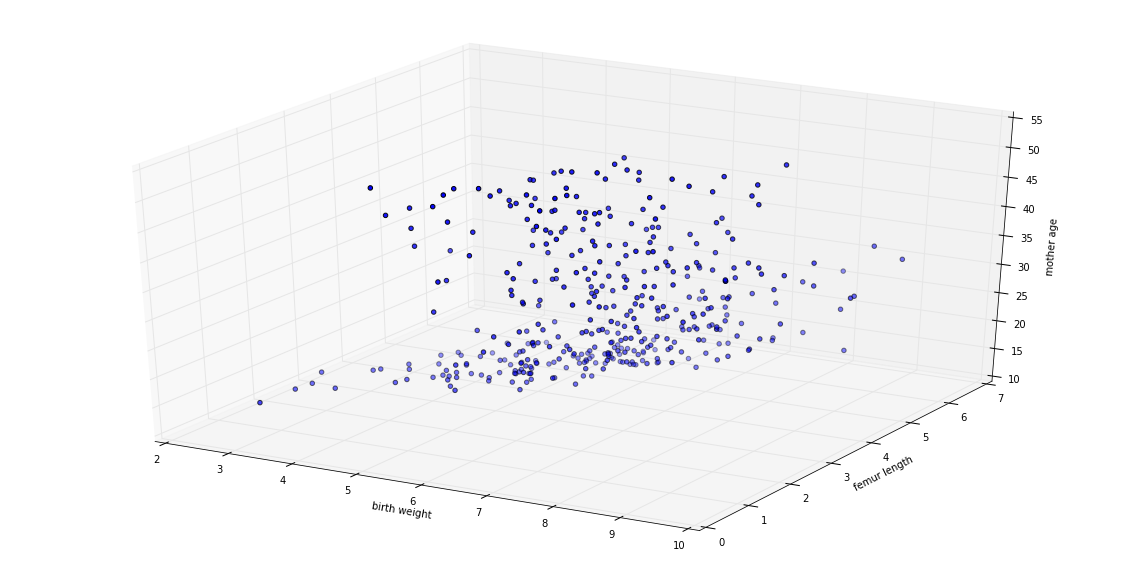

In [216]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(birth_data[:,0], birth_data[:,1], birth_data[:,2])
ax.set_xlabel('birth weight')
ax.set_ylabel('femur length')
ax.set_zlabel('mother age')
#There is a trend in the femur length with birth weight across different mother ages so these two variables appear 
# to be related. 

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

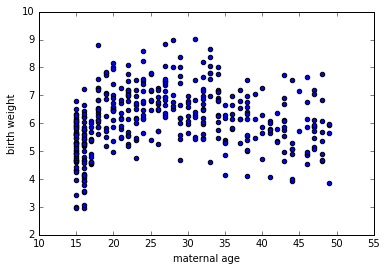

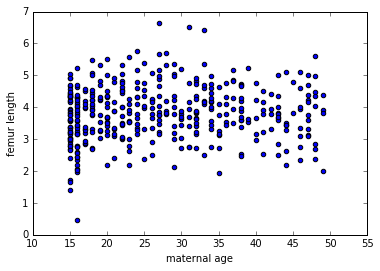

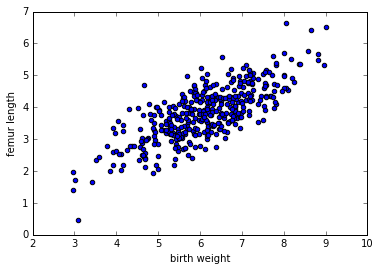

In [58]:
plt.figure(1)
plt.scatter(birth_data[:,2], birth_data[:,0])
plt.xlabel('maternal age')
plt.ylabel('birth weight')
plt.figure(2)
plt.scatter(birth_data[:,2], birth_data[:,1])
plt.xlabel('maternal age')
plt.ylabel('femur length')
plt.figure(3)
plt.scatter(birth_data[:,0], birth_data[:,1])
plt.xlabel('birth weight')
plt.ylabel('femur length')

# For each maternal age there is a range of birth weights and femur lengths but no clear relationship between 
# the maternal age and either femur length or birth weight
# The plot of birth weight vs femur lengths shows an upward trend, with the femur length increasing as birth weight
# increases

### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

Compare your visual analysis with your analysis from Part (a) - (c).

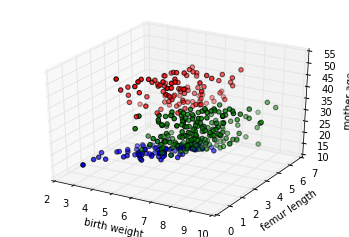

In [60]:
ax_by_age = plt.figure(4).add_subplot(111, projection='3d')
ax_by_age.scatter(group_1[:,0], group_1[:,1], group_1[:,2], c='b')
ax_by_age.scatter(group_2[:,0], group_2[:,1], group_2[:,2], c='g')
ax_by_age.scatter(group_3[:,0], group_3[:,1], group_3[:,2], c='r')
ax_by_age.set_xlabel('birth weight')
ax_by_age.set_ylabel('femur length')
ax_by_age.set_zlabel('mother age')

# three distinct bands can be seen in the data. For group 1 there is a large spread in the birth weights and femur 
# lengths and smaller spreads for groups 2 and 3. The data for group 2 is concentrated in a smaller range of birth 
# weights and femur lengths and the highest values for both these properties are also from this group.

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 

$\mathtt{http://www.gutenberg.org/files/5200/5200-h/5200-h.htm}$

into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the $\mathtt{prettify()}$ function.

In [4]:
page = urllib.urlopen('http://www.gutenberg.org/files/5200/5200-h/5200-h.htm').read()
soup = BeautifulSoup(page, 'html.parser')
chars = soup.prettify()
print chars[0:1000]

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
  </meta>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the text of the head tag
3. each child of the head tag
2. the text of the title tag
3. the text of the preamble (pre) tag
4. the text of the first paragraph (p) tag

In [5]:
print 'head tag: ', soup.head
print "====================================="
print 'text of head tag:', soup.head.string
print "====================================="
print 'children of head tag:'
for child in soup.head.children:
    print(child)
print "====================================="
print 'text of title tag:', soup.title.string
print "====================================="
print 'text of the preamble tag:', soup.pre.string
print "====================================="
print 'text of the first paragraph tag:', soup.p.string

head tag:  <head>
<title>Metamorphosis by Franz Kafka</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
</meta></head>
text of head tag: None
children of head tag:


<title>Metamorphosis by Franz Kafka</title>


<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
</meta>
text of title tag: Metamorphosis by Franz Kafka
text of the preamble tag: 

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13,

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the $\mathtt{get}$_$\mathtt{text()}$ function. 

Print the first and last 5000 characters of the text returned by $\mathtt{get}$_$\mathtt{text()}$. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

In [6]:
chars = soup.get_text()
print 'first 5000 characters', chars[0:5000]
print '==================================='
print 'last 5000 characters', chars[-5000:]
# some of the text of the novella is in the first 5000 characters of the text 
# but the full content of the novella is in <p> tags in the Beautiful Soup object

first 5000 characters 


Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he found
himself tr

### Part (d): Extracting Text (Continued)

Using the $\mathtt{find}$_$\mathtt{all()}$ function, extract the text of all $\mathtt{p}$ tags and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

In [122]:
text = ''
for para in soup.find_all('p'):
   text += para.text
print text[0:1000]

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked."What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of her


### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

number of words 22046
average word length 4.24185793341 characters


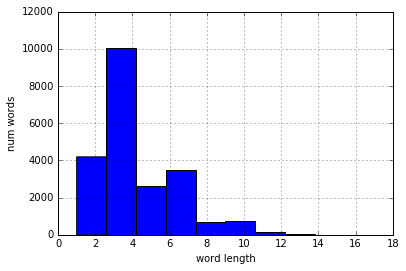

number of sentences 759
average sentence length 28.7812911726 words


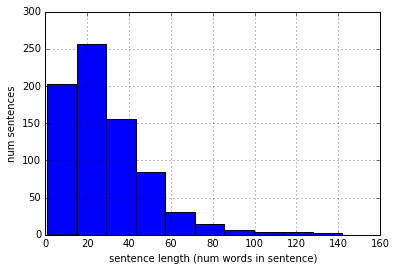

In [338]:
import re
# replace special characters with empty space
def process_text(text):
    return text.replace('-', ' ').replace('"', '').replace('\\', '').replace("'", '').replace(":", '')
def findwords(t):
   #return re.compile('\w+').findall(text) 
    # use filter to remove blanks
    return filter(None, re.split("[\s|.|?|!|,]", t))
# when there is text in quotation marks, splitting on ! or ? or . becomes more complicated and there are many edge cases
# only a few are considered here
def find_sentences(text):
    return re.compile('(?<!")[.*|\n]*\.(?="|[\w+\s])|(?<!").*\?(?= )|\!(?=" )').split(text)
def words_in_sentence(sentence):
    words = findwords(process_text(sentence))
    # sentence length assumed to equal the number of words in the sentence
    return len(words)

processed_text = process_text(text)
words = findwords(processed_text)
print 'number of words', len(words)
word_lengths = [len(word) for word in words]
print 'average word length', sum(word_lengths)/float(len(word_lengths)), 'characters'
plt.hist(word_lengths)
plt.xlabel('word length')
plt.ylabel('num words')
plt.grid(True)
plt.show()

sentences = find_sentences(text)
sentence_lengths = [words_in_sentence(sentence) for sentence in sentences]
print 'number of sentences', len(sentences)
print 'average sentence length', sum(sentence_lengths)/float(len(sentence_lengths)), 'words'
plt.figure(2)
plt.hist(sentence_lengths, 10)
plt.xlabel('sentence length (num words in sentence)')
plt.ylabel('num sentences')
plt.grid(True)
plt.show()


## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 6 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the $\mathtt{uniform()}$ function from the $\mathtt{random}$ library.

In [271]:
def gen_times():
    arrival_intervals = [random.uniform(1, 20) for x in range(100)]
    service_times = [random.uniform(5, 15) for x in range(100)]
    return [arrival_intervals, service_times]

### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

In [333]:
import math

def find_average(list):
    return reduce(lambda x, y: x + y, list) / float(len(list))

def queue_props(arrival_intervals, service_times):
    arrival_times = [sum(arrival_intervals[0:i]) for i,val in enumerate(arrival_intervals)]
    departure_times = np.zeros(100)
    wait_times = np.zeros(100)
    queue_length = np.zeros(100)
    for i, arrival in enumerate(arrival_times):
        if i == 0:
            queue_length[i] = 0
            wait_times[i] = 0
            departure_times[i] = arrival + service_times[i] # first person is served immediately
        else:
            wait_times[i] = max(departure_times[i-1] - arrival, 0) # need to wait if depart time of previous p is > your arrival
            departure_times[i] = arrival + wait_times[i] + service_times[i] # departure time is your arrival time + wait time + service time
            queue = 0
            for j in range(i-1,0,-1):
                if departure_times[j] > arrival:
                    queue +=1
            queue_length[i] = queue
    avg_wait = find_average(wait_times)
    avg_queue = find_average(queue_length)
    return [avg_wait, avg_queue]
times = gen_times()
props = queue_props(times[0], times[1]) 
print 'Average wait time', props[0], 'mins, Average queue length: ', props[1]

Average wait time 18.1995583511 mins, Average queue length:  2.16


### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

The arrival times and service times are randomly chosen from the uniform distribution so each time the simulation is run the averages fluctuate by large amounts. By averaging over 500 executions of the simulations these fluctuations can be smoothed.  

In [335]:
times = [gen_times() for x in range(500)]
properties = np.transpose([queue_props(time[0], time[1]) for time in times])
mean_wait = np.mean(properties[0])
std_wait = np.std(properties[0])
mean_queue = np.mean(properties[1])
std_queue = np.std(properties[1])
print 'Mean wait time: ', round(mean_wait, 3), 'mins, Mean queue length: ', mean_queue
print 'Standard deviation wait time: ', round(std_wait,3), 'mins,  Standard deviation queue length: ', std_queue

Mean wait time:  18.83 mins, Mean queue length:  2.27222
Standard deviation wait time:  12.719 mins,  Standard deviation queue length:  1.27021827715


## Problem 4 (Challenge Problem): More Web Scrapping

In this problem we practice extracting tabular web data. Open and read the webpage at

$\mathtt{http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html}$

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).

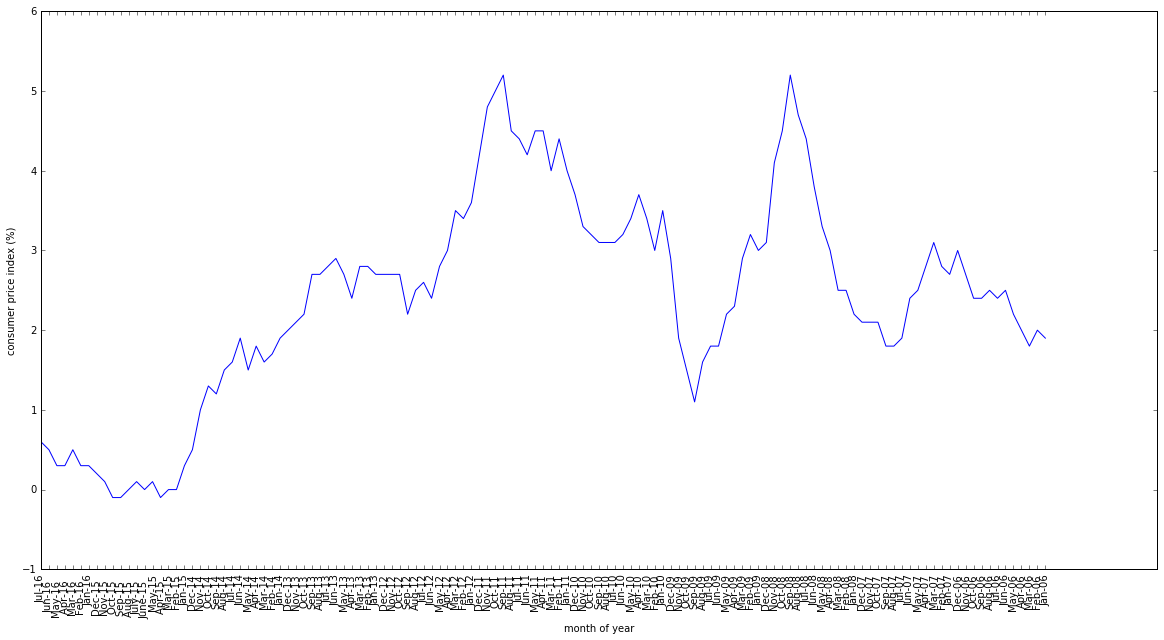

In [209]:
web_page = urllib.urlopen('http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html').read()
soup = BeautifulSoup(web_page, 'html.parser')
characters = soup.prettify()
table = soup.find("caption", text="INFLATION HISTORY (MONTHLY CONSUMER PRICES INDEX - CPI)").find_parent("table")
rows = table.findAll("tr")
months = []
inflation = []
for row in rows[:-3]:
    cols = row.findAll("td")
    months.append(cols[0].text)
    inflation.append(cols[1].text)
inflation = [float(value[:-2]) for value in inflation]
xvals = range(len(rows)-3)
plt.figure(figsize=(20,10))
plt.plot(xvals, inflation)
plt.xticks(xvals, months, rotation=90)
plt.xlabel('month of year')
plt.ylabel('consumer price index (%)')